In [1]:
# Sourced from https://realpython.com/generative-adversarial-networks/

In [35]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

import pdb

In [36]:
torch.manual_seed(111)

# Training data

In [37]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

# Explore

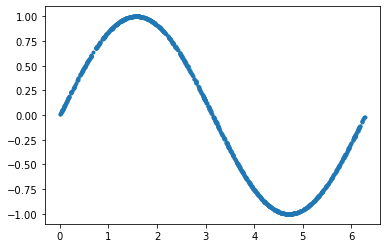

In [38]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [39]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

# Discriminator

In [40]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output
    
discriminator = Discriminator()

# Generator

In [41]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

# Training

In [42]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [43]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.35936054587364197
Epoch: 0 Loss G.: 0.8747320175170898


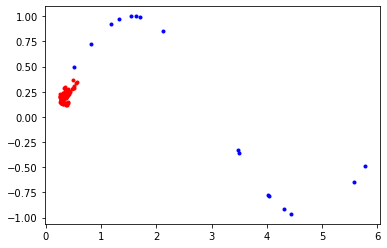

Epoch: 10 Loss D.: 0.6252732872962952
Epoch: 10 Loss G.: 1.1392465829849243


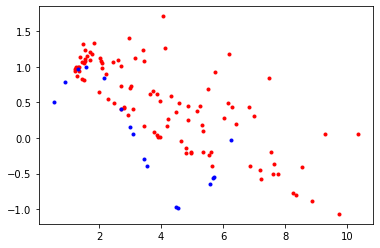

Epoch: 20 Loss D.: 0.6398199200630188
Epoch: 20 Loss G.: 0.8881275057792664


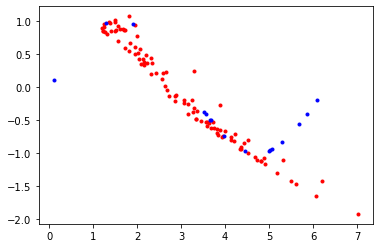

Epoch: 30 Loss D.: 0.6213152408599854
Epoch: 30 Loss G.: 0.8780412673950195


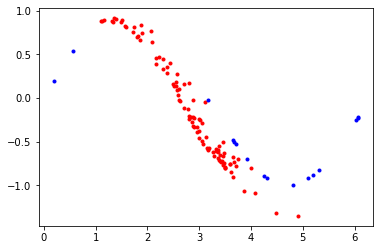

Epoch: 40 Loss D.: 0.7057920098304749
Epoch: 40 Loss G.: 0.6341375708580017


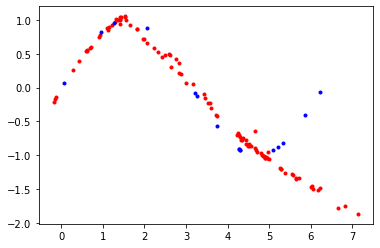

Epoch: 50 Loss D.: 0.6431359052658081
Epoch: 50 Loss G.: 0.6880048513412476


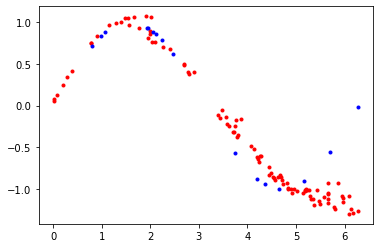

Epoch: 60 Loss D.: 0.6665734052658081
Epoch: 60 Loss G.: 0.8390219211578369


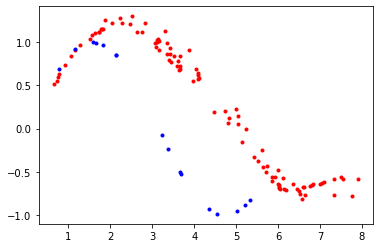

Epoch: 70 Loss D.: 0.6768775582313538
Epoch: 70 Loss G.: 0.7233192920684814


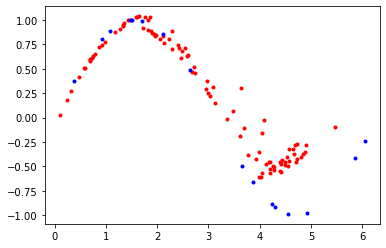

Epoch: 80 Loss D.: 0.6863982677459717
Epoch: 80 Loss G.: 0.7242815494537354


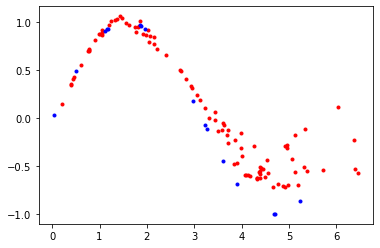

Epoch: 90 Loss D.: 0.6979709267616272
Epoch: 90 Loss G.: 0.7252677083015442


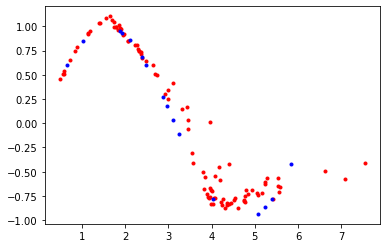

Epoch: 100 Loss D.: 0.6870274543762207
Epoch: 100 Loss G.: 0.8201671838760376


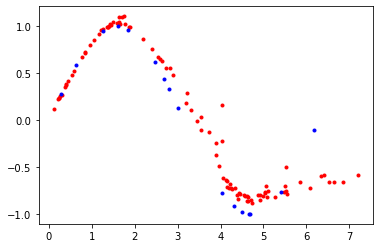

Epoch: 110 Loss D.: 0.6278994679450989
Epoch: 110 Loss G.: 0.8043382167816162


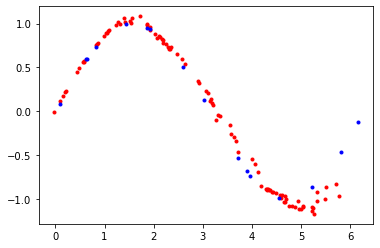

Epoch: 120 Loss D.: 0.6349915862083435
Epoch: 120 Loss G.: 0.7575678825378418


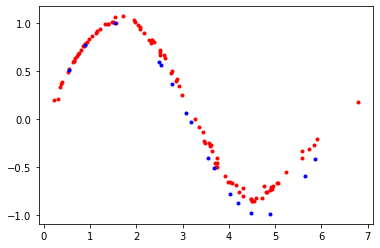

Epoch: 130 Loss D.: 0.672349750995636
Epoch: 130 Loss G.: 0.7679448127746582


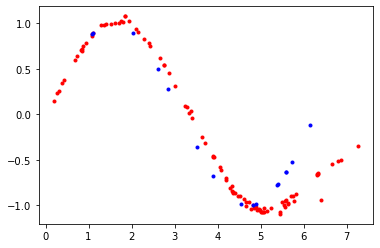

Epoch: 140 Loss D.: 0.7040456533432007
Epoch: 140 Loss G.: 0.7473727464675903


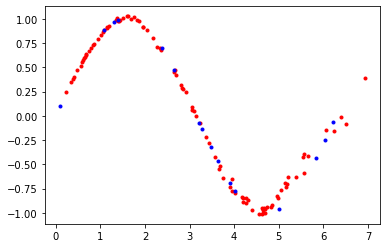

Epoch: 150 Loss D.: 0.6807689666748047
Epoch: 150 Loss G.: 0.7598088979721069


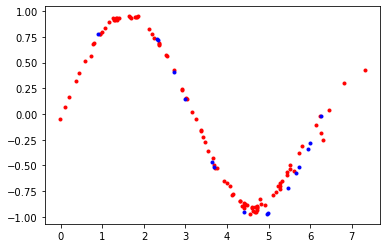

Epoch: 160 Loss D.: 0.6895264387130737
Epoch: 160 Loss G.: 0.6667426228523254


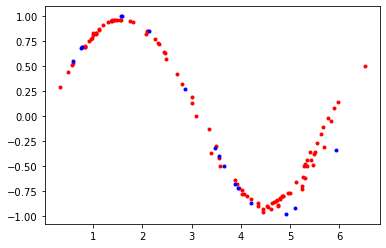

Epoch: 170 Loss D.: 0.7738780379295349
Epoch: 170 Loss G.: 0.6957210302352905


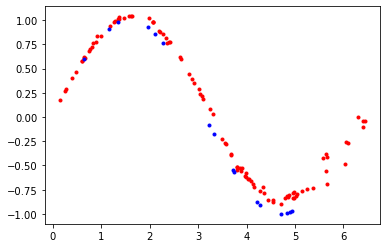

Epoch: 180 Loss D.: 0.6741465330123901
Epoch: 180 Loss G.: 0.7708966732025146


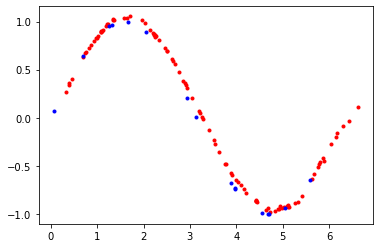

Epoch: 190 Loss D.: 0.6961269974708557
Epoch: 190 Loss G.: 0.7291640043258667


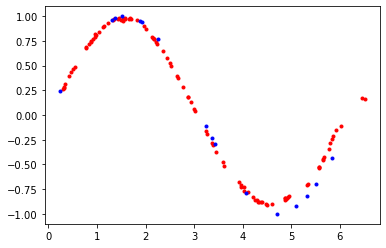

Epoch: 200 Loss D.: 0.7043473124504089
Epoch: 200 Loss G.: 0.7928825616836548


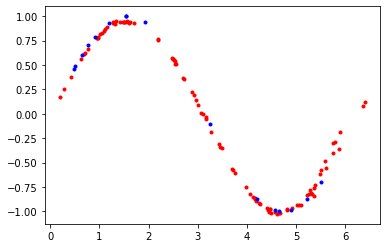

Epoch: 210 Loss D.: 0.7000815272331238
Epoch: 210 Loss G.: 0.6060473322868347


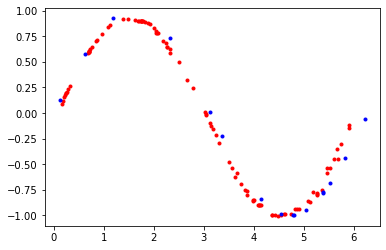

Epoch: 220 Loss D.: 0.6992066502571106
Epoch: 220 Loss G.: 0.728954553604126


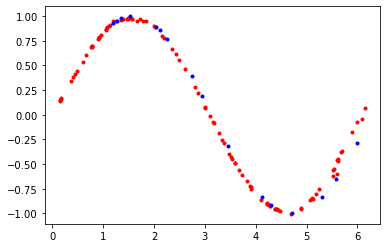

Epoch: 230 Loss D.: 0.73857581615448
Epoch: 230 Loss G.: 0.7077142596244812


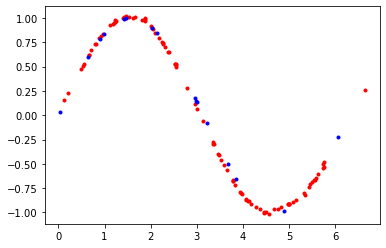

Epoch: 240 Loss D.: 0.6774424314498901
Epoch: 240 Loss G.: 0.7453970909118652


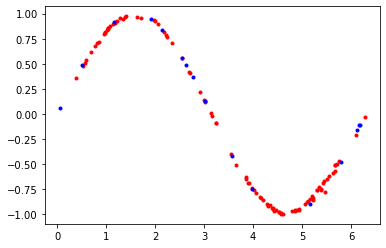

Epoch: 250 Loss D.: 0.6679611802101135
Epoch: 250 Loss G.: 0.5803359746932983


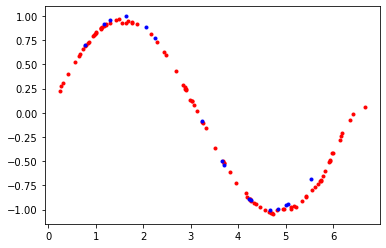

Epoch: 260 Loss D.: 0.7350027561187744
Epoch: 260 Loss G.: 0.8499026298522949


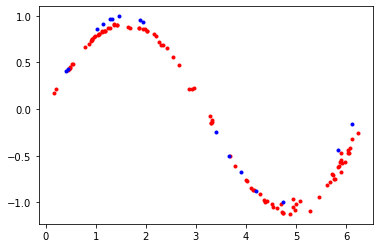

Epoch: 270 Loss D.: 0.6286845803260803
Epoch: 270 Loss G.: 0.7835137248039246


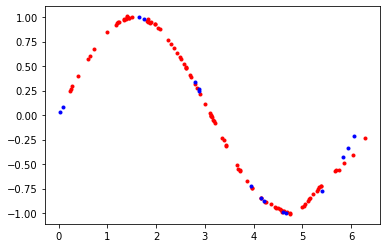

Epoch: 280 Loss D.: 0.6348972916603088
Epoch: 280 Loss G.: 0.7267678380012512


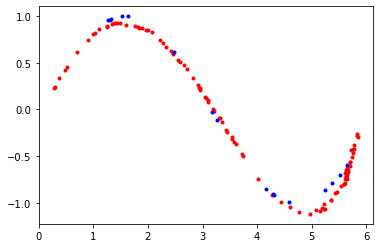

Epoch: 290 Loss D.: 0.6719112396240234
Epoch: 290 Loss G.: 0.7750780582427979


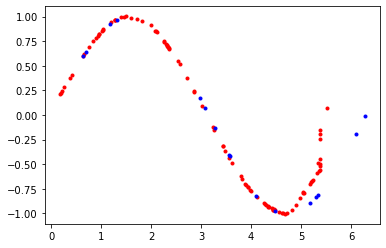

In [44]:

for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        #pdb.set_trace()
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            
            
            # Plot generated samples against real samples
            fig = plt.figure()

            latent_space_samples = torch.randn(100, 2)
            generated_samples = generator(latent_space_samples)

            generated_samples = generated_samples.detach()
            plt.plot(generated_samples[:, 0], generated_samples[:, 1], "r.")
            plt.plot(real_samples[:, 0], real_samples[:, 1], "b.")
            plt.show()

# Checking the Samples Generated by the GAN

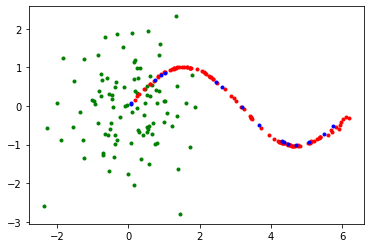

In [47]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

generated_samples = generated_samples.detach()
plt.plot(latent_space_samples[:, 0], latent_space_samples[:, 1], "g.")
plt.plot(generated_samples[:, 0], generated_samples[:, 1], "r.")
plt.plot(real_samples[:, 0], real_samples[:, 1], "b.")